<a href="https://colab.research.google.com/github/Ahmed1010-1999/deep_learnig/blob/main/pytorch_model_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
from pickle import NONE
weight=0.7
bias=0.3
X=torch.arange(start=0,end=1,step=0.02).unsqueeze(dim=1)
y=bias+X*weight
x_train=X[:int(0.8*len(X))]
y_train=y[:int(0.8*len(X))]
x_test=X[int(0.8*len(X)):]
y_test=y[int(0.8*len(X)):]
def plot_predictions(train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c='r',s=4,label='training')
  plt.scatter(test_data,test_label,c='b',s=4,label='test')
  plt.legend()
  if predictions is not None:
    plt.scatter(test_data,predictions,c='green',s=4,label='prediction')
    plt.legend()
  plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)



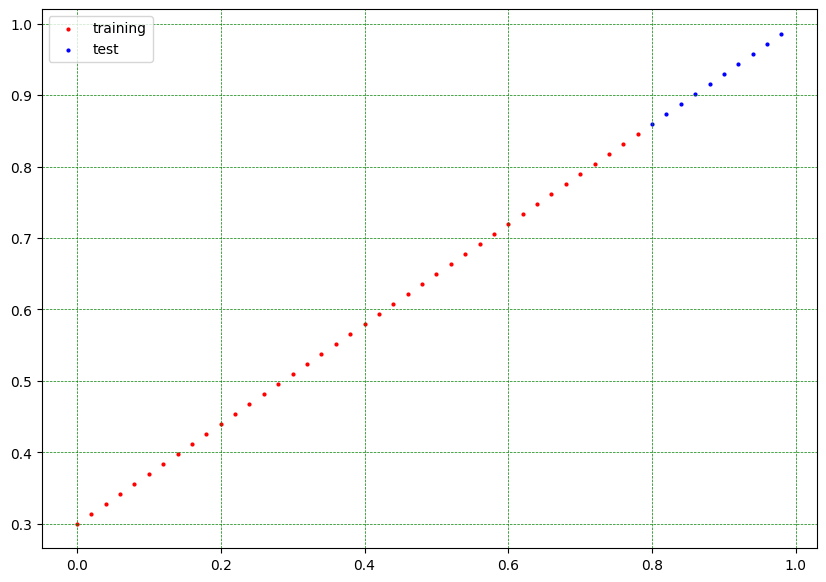

In [ ]:
plot_predictions()

In [ ]:


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_preds=model_0(x_test)

print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


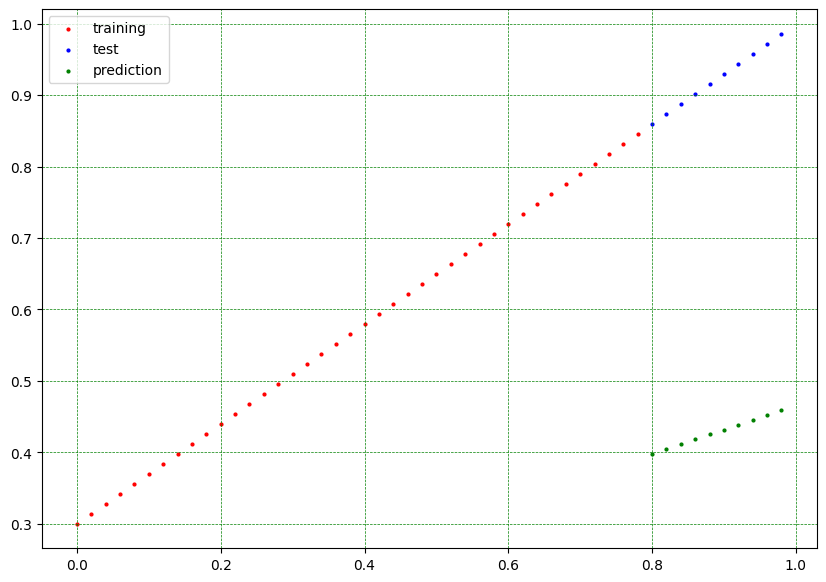

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.000001)


In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 10000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.0050711194053292274 | MAE Test Loss: 0.011856180615723133 
Epoch: 10 | MAE Train Loss: 0.005070745944976807 | MAE Test Loss: 0.011855488643050194 
Epoch: 20 | MAE Train Loss: 0.005070372484624386 | MAE Test Loss: 0.011854785494506359 
Epoch: 30 | MAE Train Loss: 0.00506999809294939 | MAE Test Loss: 0.011854094453155994 
Epoch: 40 | MAE Train Loss: 0.00506963487714529 | MAE Test Loss: 0.01185339130461216 
Epoch: 50 | MAE Train Loss: 0.005069254897534847 | MAE Test Loss: 0.011852693744003773 
Epoch: 60 | MAE Train Loss: 0.005068875849246979 | MAE Test Loss: 0.011852001771330833 
Epoch: 70 | MAE Train Loss: 0.005068509839475155 | MAE Test Loss: 0.011851298622786999 
Epoch: 80 | MAE Train Loss: 0.005068130791187286 | MAE Test Loss: 0.011850607581436634 
Epoch: 90 | MAE Train Loss: 0.005067755933851004 | MAE Test Loss: 0.0118499044328928 
Epoch: 100 | MAE Train Loss: 0.005067392252385616 | MAE Test Loss: 0.011849110946059227 
Epoch: 110 | MAE Train Loss: 0.00506

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6766])), ('bias', tensor([0.3098]))])

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.6766])), ('bias', tensor([0.3098]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():

  y_preds = model_0(x_test)
y_preds

tensor([[0.8511],
        [0.8646],
        [0.8782],
        [0.8917],
        [0.9052],
        [0.9187],
        [0.9323],
        [0.9458],
        [0.9593],
        [0.9729]])

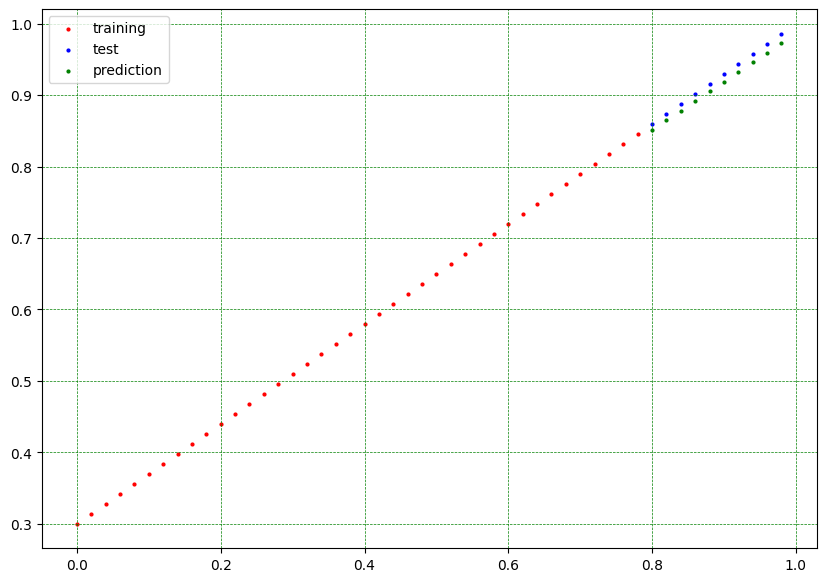

In [ ]:
plot_predictions(predictions=y_preds)
